Starting Enhanced Stock Prediction Analysis
Successfully loaded data from: C:/Users/hp/Downloads/stock_data.csv
Dataset shape: (365, 5)
Date range: 2020-01-01 to 2020-12-30
Stocks: ['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5']

=== DATA QUALITY ANALYSIS ===
Stock_1: 0.0% missing values
Stock_2: 0.0% missing values
Stock_3: 0.0% missing values
Stock_4: 0.0% missing values
Stock_5: 0.0% missing values

Price Statistics:
       Stock_1  Stock_2  Stock_3  Stock_4  Stock_5
count   365.00   365.00   365.00   365.00   365.00
mean    107.77    81.11    94.52   117.41   106.87
std       7.40    11.44     6.52     6.78     3.76
min      91.47    62.41    81.11    99.91    99.83
25%     101.60    69.33    89.79   112.21   103.93
50%     107.42    84.28    94.50   117.79   106.41
75%     113.74    91.55    99.92   123.13   109.18
max     121.90   100.16   107.59   129.91   116.24


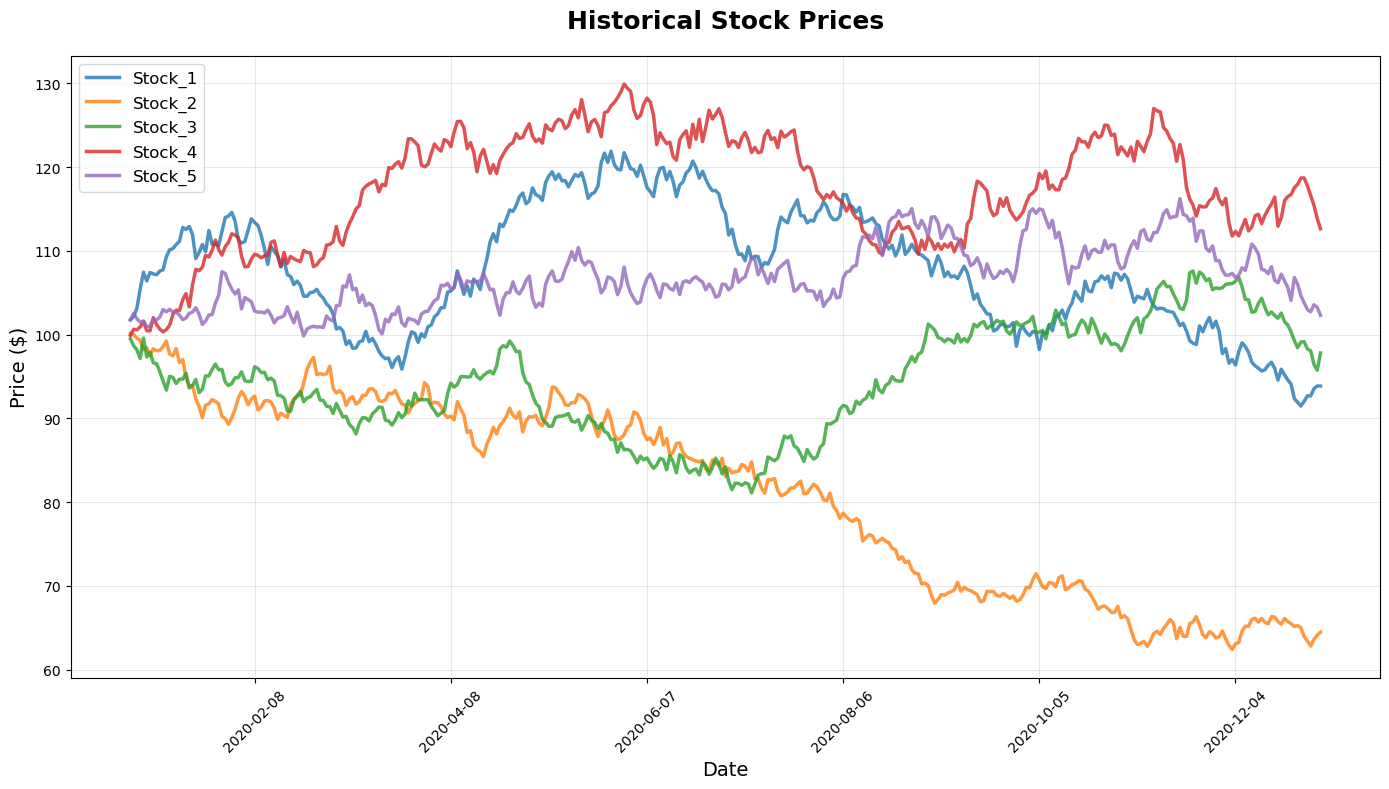

21:22:00 - cmdstanpy - INFO - Chain [1] start processing



=== COMPREHENSIVE TREND ANALYSIS ===
Stock_1:
   Price: $101.76 → $93.86 (-7.77%)
   Range: $91.47 - $121.90
   Volatility: 0.99%
   Trend: BEARISH

Stock_2:
   Price: $100.16 → $64.49 (-35.61%)
   Range: $62.41 - $100.16
   Volatility: 1.01%
   Trend: BEARISH

Stock_3:
   Price: $99.49 → $97.81 (-1.70%)
   Range: $81.11 - $107.59
   Volatility: 0.94%
   Trend: NEUTRAL

Stock_4:
   Price: $99.91 → $112.64 (+12.74%)
   Range: $99.91 - $129.91
   Volatility: 0.99%
   Trend: BULLISH

Stock_5:
   Price: $101.76 → $102.30 (+0.53%)
   Range: $99.83 - $116.24
   Volatility: 0.98%
   Trend: NEUTRAL


=== TRAINING MODELS ===
Training models for Stock_1...
  Training Prophet for Stock_1...


21:22:00 - cmdstanpy - INFO - Chain [1] done processing


  Training LSTM for Stock_1...


21:22:23 - cmdstanpy - INFO - Chain [1] start processing


Stock_1 completed successfully
Training models for Stock_2...
  Training Prophet for Stock_2...


21:22:23 - cmdstanpy - INFO - Chain [1] done processing


  Training LSTM for Stock_2...


21:22:37 - cmdstanpy - INFO - Chain [1] start processing


Stock_2 completed successfully
Training models for Stock_3...
  Training Prophet for Stock_3...


21:22:37 - cmdstanpy - INFO - Chain [1] done processing


  Training LSTM for Stock_3...


21:22:53 - cmdstanpy - INFO - Chain [1] start processing


Stock_3 completed successfully
Training models for Stock_4...
  Training Prophet for Stock_4...


21:22:53 - cmdstanpy - INFO - Chain [1] done processing


  Training LSTM for Stock_4...


21:23:12 - cmdstanpy - INFO - Chain [1] start processing


Stock_4 completed successfully
Training models for Stock_5...
  Training Prophet for Stock_5...


21:23:12 - cmdstanpy - INFO - Chain [1] done processing


  Training LSTM for Stock_5...
Stock_5 completed successfully

=== DETAILED MODEL PERFORMANCE ===
  Stock  Prophet_MAE  Prophet_RMSE  Prophet_R2  Prophet_MAPE  Prophet_Dir_Acc  LSTM_MAE  LSTM_RMSE  LSTM_R2  LSTM_MAPE  LSTM_Dir_Acc
Stock_1       0.9591        1.2007      0.9736          0.89             62.9    1.2345     1.5696   0.9569       1.15          48.0
Stock_2       0.8324        1.0694      0.9912          1.03             56.9    1.3675     1.7698   0.9741       1.69          48.5
Stock_3       0.8690        1.0993      0.9715          0.93             57.1    1.2277     1.5342   0.9471       1.31          47.7
Stock_4       1.2082        1.5067      0.9505          1.02             59.3    1.5025     1.8249   0.9005       1.27          53.8
Stock_5       1.0489        1.3130      0.8778          0.98             58.0    1.0355     1.3103   0.8730       0.97          50.6

=== MODEL SELECTION ===
Stock_1: Prophet (Score: 0.926, R²: 0.9736)
Stock_2: Prophet (Score: 0.927, R²:

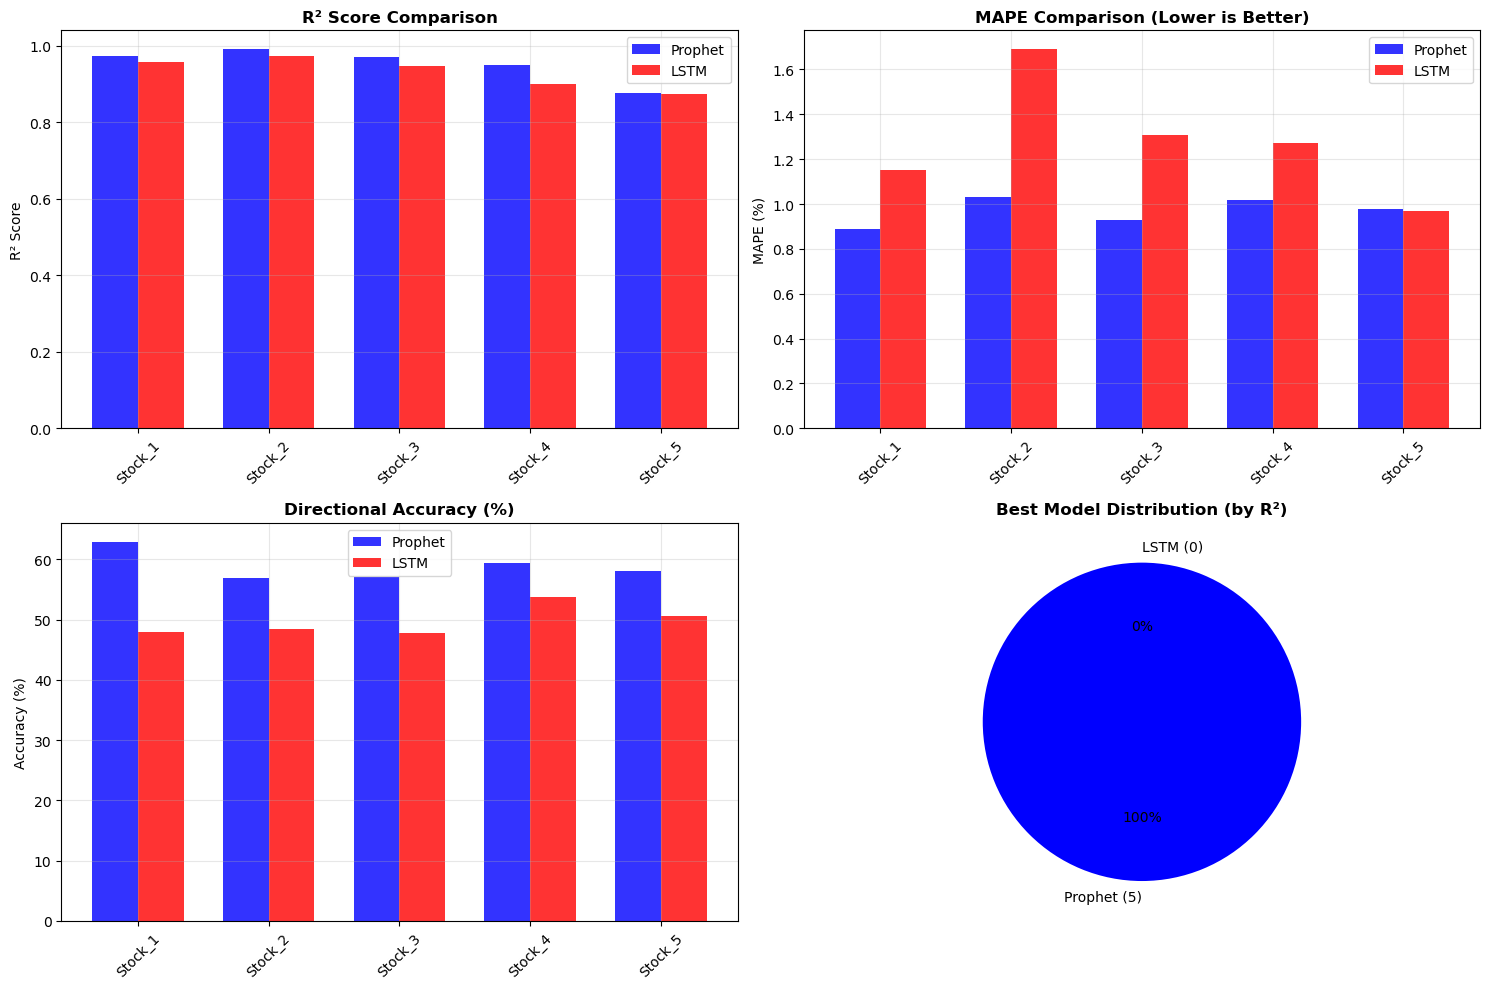

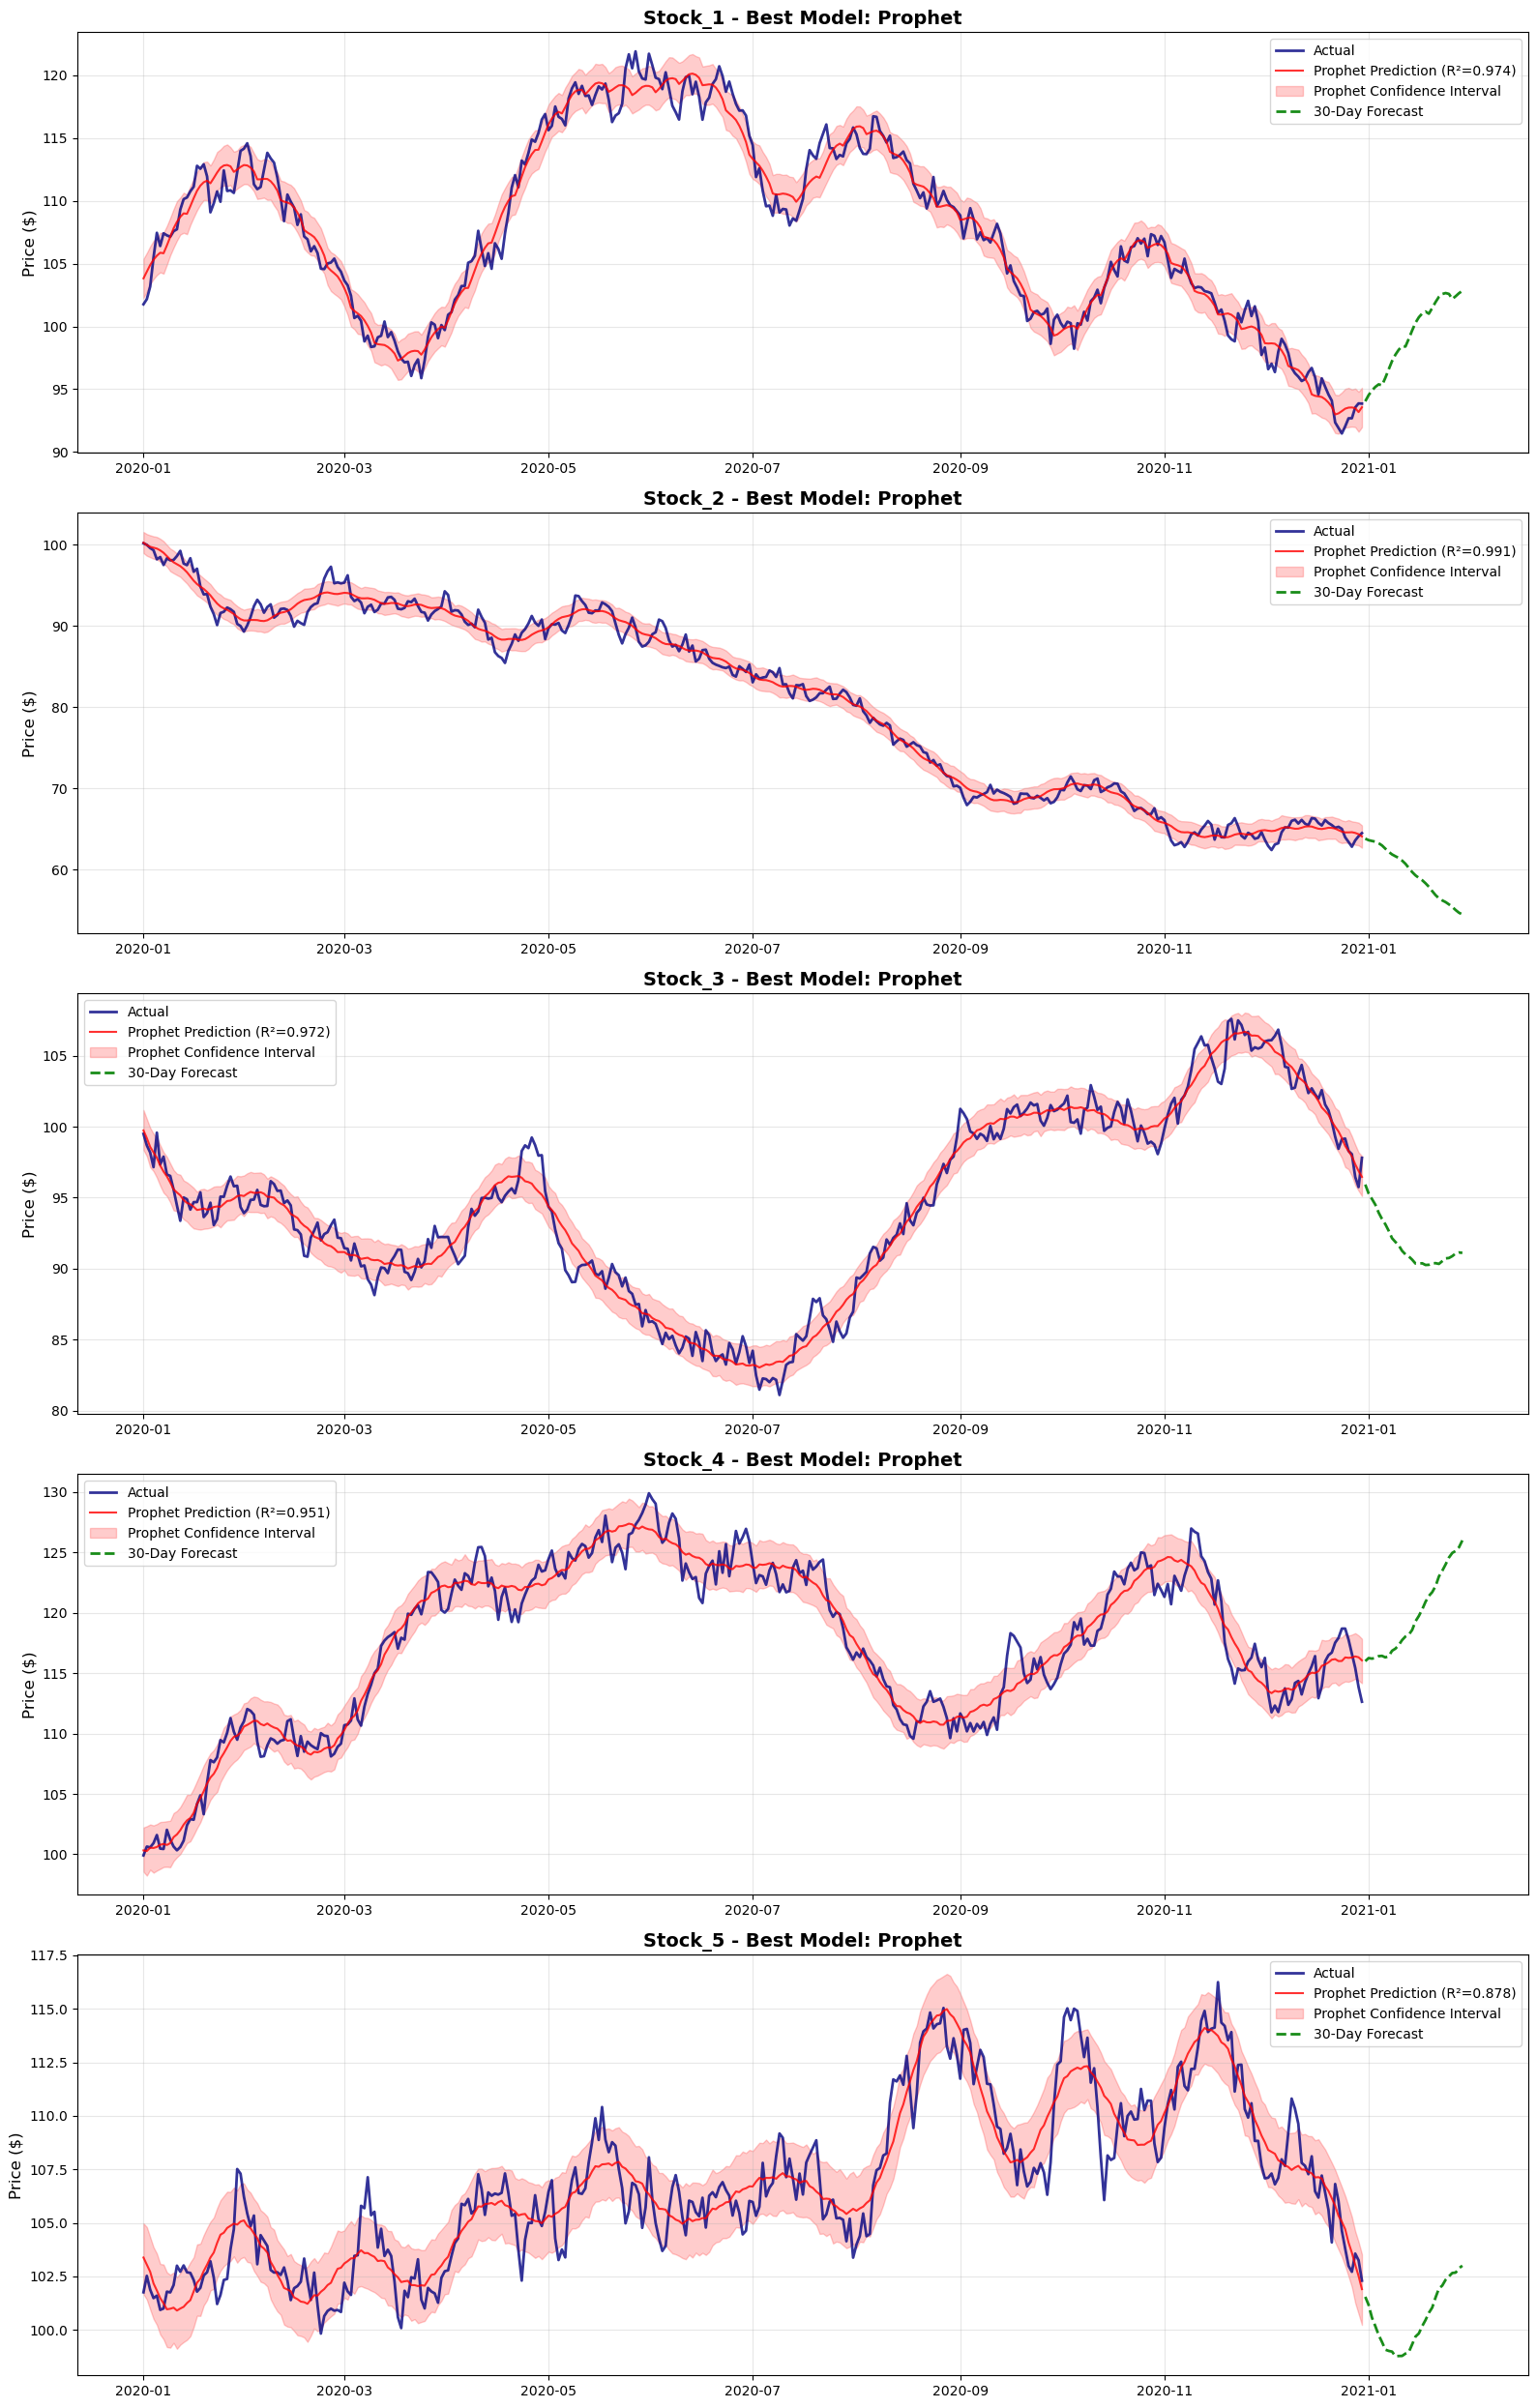


30-DAY FORECAST SUMMARY

Stock_1 (Prophet Model):
   Current Price: $93.86
   30-Day Forecast: $102.83
   Expected Change: +9.56%
   Forecast Trend: Upward
   Next 7 Days:
     2020-12-31: $94.04
     2021-01-01: $94.53
     2021-01-02: $94.90
     2021-01-03: $95.18
     2021-01-04: $95.39
     2021-01-05: $95.31
     2021-01-06: $95.91

Stock_2 (Prophet Model):
   Current Price: $64.49
   30-Day Forecast: $54.50
   Expected Change: -15.50%
   Forecast Trend: Downward
   Next 7 Days:
     2020-12-31: $63.81
     2021-01-01: $63.62
     2021-01-02: $63.53
     2021-01-03: $63.45
     2021-01-04: $63.25
     2021-01-05: $62.98
     2021-01-06: $62.58

Stock_3 (Prophet Model):
   Current Price: $97.81
   30-Day Forecast: $91.11
   Expected Change: -6.84%
   Forecast Trend: Downward
   Next 7 Days:
     2020-12-31: $95.92
     2021-01-01: $95.30
     2021-01-02: $94.91
     2021-01-03: $94.51
     2021-01-04: $93.95
     2021-01-05: $93.50
     2021-01-06: $93.13

Stock_4 (Prophet Model)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, timedelta
import seaborn as sns
from pathlib import Path

from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')

class Config:
    LOOK_BACK = 20
    LSTM_UNITS = 100
    DROPOUT_RATE = 0.2
    BATCH_SIZE = 32
    EPOCHS = 100
    TREND_THRESHOLD = 5
    FIGURE_SIZE = (14, 8)

config = Config()

def load_and_prepare_data(file_path):
    try:
        possible_paths = [
            file_path,
            "stock_data.csv",
            "data/stock_data.csv",
            str(Path.cwd() / "stock_data.csv")
        ]
        
        df = None
        for path in possible_paths:
            try:
                df = pd.read_csv(path)
                print(f"Successfully loaded data from: {path}")
                break
            except FileNotFoundError:
                continue
        
        if df is None:
            raise FileNotFoundError("Could not find stock_data.csv in any expected location")
        
        if "Unnamed: 0" in df.columns:
            df = df.rename(columns={"Unnamed: 0": "Date"})
        
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.set_index("Date").sort_index()
        df = df.dropna(how='all')
        df = df.fillna(method='ffill')
        
        print(f"Dataset shape: {df.shape}")
        print(f"Date range: {df.index.min().date()} to {df.index.max().date()}")
        print(f"Stocks: {list(df.columns)}")
        
        return df
        
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def analyze_data_quality(df):
    print("\n=== DATA QUALITY ANALYSIS ===")
    for stock in df.columns:
        missing_pct = (df[stock].isna().sum() / len(df)) * 100
        print(f"{stock}: {missing_pct:.1f}% missing values")
    
    print("\nPrice Statistics:")
    print(df.describe().round(2))

class EnhancedProphet:
    def __init__(self):
        self.model = Prophet(
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=True,
            changepoint_prior_scale=0.05,
            seasonality_prior_scale=10
        )
        self.fitted_data = None
        
    def fit(self, stock_series):
        self.fitted_data = stock_series.reset_index().rename(
            columns={"Date": "ds", stock_series.name: "y"}
        )
        self.fitted_data = self.fitted_data.dropna()
        self.model.fit(self.fitted_data)
        return self
    
    def predict_training(self):
        if self.fitted_data is None:
            raise ValueError("Model not fitted yet")
        forecast = self.model.predict(self.fitted_data)
        return forecast
    
    def forecast(self, periods=30):
        if self.fitted_data is None:
            raise ValueError("Model not fitted yet")
        future = self.model.make_future_dataframe(periods=periods)
        forecast = self.model.predict(future)
        return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods)

class EnhancedLSTM:
    def __init__(self, look_back=20, units=100, dropout=0.2):
        self.look_back = look_back
        self.units = units
        self.dropout = dropout
        self.model = None
        self.scaler = MinMaxScaler()
        self.history = None
        self.training_data = None
        
    def _create_model(self):
        model = Sequential([
            LSTM(self.units, return_sequences=True, input_shape=(self.look_back, 1)),
            Dropout(self.dropout),
            LSTM(self.units//2, return_sequences=False),
            Dropout(self.dropout),
            Dense(25),
            Dense(1)
        ])
        
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model
    
    def _prepare_data(self, data):
        self.training_data = data
        data_scaled = self.scaler.fit_transform(data.values.reshape(-1, 1))
        X, y = [], []
        
        for i in range(self.look_back, len(data_scaled)):
            X.append(data_scaled[i-self.look_back:i, 0])
            y.append(data_scaled[i, 0])
            
        return np.array(X), np.array(y)
    
    def fit(self, stock_series):
        X, y = self._prepare_data(stock_series)
        X = X.reshape((X.shape[0], X.shape[1], 1))
        
        self.model = self._create_model()
        
        callbacks = [
            EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
            ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-7)
        ]
        
        self.history = self.model.fit(
            X, y,
            epochs=config.EPOCHS,
            batch_size=config.BATCH_SIZE,
            verbose=0,
            callbacks=callbacks,
            validation_split=0.1
        )
        
        return self
    
    def predict_training(self):
        if self.training_data is None:
            raise ValueError("Model not fitted yet")
            
        data_scaled = self.scaler.transform(self.training_data.values.reshape(-1, 1))
        X = []
        
        for i in range(self.look_back, len(data_scaled)):
            X.append(data_scaled[i-self.look_back:i, 0])
            
        X = np.array(X).reshape(len(X), self.look_back, 1)
        pred_scaled = self.model.predict(X, verbose=0)
        pred = self.scaler.inverse_transform(pred_scaled).flatten()
        
        return pred
    
    def forecast(self, periods=30):
        if self.training_data is None:
            raise ValueError("Model not fitted yet")
            
        data = self.training_data.values.reshape(-1, 1)
        data_scaled = self.scaler.transform(data)
        
        input_seq = data_scaled[-self.look_back:].reshape(1, self.look_back, 1)
        forecast_scaled = []
        
        for _ in range(periods):
            pred = self.model.predict(input_seq, verbose=0)
            forecast_scaled.append(pred[0, 0])
            input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
        
        forecast_values = self.scaler.inverse_transform(
            np.array(forecast_scaled).reshape(-1, 1)
        ).flatten()
        
        forecast_dates = pd.date_range(
            self.training_data.index[-1] + pd.Timedelta(days=1), 
            periods=periods
        )
        
        return pd.DataFrame({
            'ds': forecast_dates,
            'yhat': forecast_values
        })

def calculate_advanced_metrics(actual, predicted):
    min_len = min(len(actual), len(predicted))
    actual = actual[:min_len]
    predicted = predicted[:min_len]
    
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    
    mape = np.mean(np.abs((actual - predicted) / np.where(actual != 0, actual, 1))) * 100
    
    if len(actual) > 1:
        actual_direction = np.sign(actual[1:] - actual[:-1])
        pred_direction = np.sign(predicted[1:] - predicted[:-1])
        directional_accuracy = np.mean(actual_direction == pred_direction) * 100
    else:
        directional_accuracy = 0
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape,
        'Directional_Accuracy': directional_accuracy
    }

def train_and_evaluate_models(df):
    results = []
    prophet_models = {}
    lstm_models = {}
    
    print("\n=== TRAINING MODELS ===")
    
    for stock in df.columns:
        print(f"Training models for {stock}...")
        
        try:
            if len(df[stock]) < config.LOOK_BACK + 10:
                print(f"Insufficient data for {stock}, skipping...")
                continue
            
            print(f"  Training Prophet for {stock}...")
            prophet_model = EnhancedProphet()
            prophet_model.fit(df[stock])
            
            prophet_pred = prophet_model.predict_training()
            actual_prophet = prophet_model.fitted_data['y'].values
            prophet_metrics = calculate_advanced_metrics(actual_prophet, prophet_pred['yhat'].values)
            prophet_models[stock] = prophet_model
            
            print(f"  Training LSTM for {stock}...")
            lstm_model = EnhancedLSTM(
                look_back=config.LOOK_BACK,
                units=config.LSTM_UNITS,
                dropout=config.DROPOUT_RATE
            )
            lstm_model.fit(df[stock])
            
            lstm_pred = lstm_model.predict_training()
            actual_lstm = df[stock].values[config.LOOK_BACK:]
            lstm_metrics = calculate_advanced_metrics(actual_lstm, lstm_pred)
            lstm_models[stock] = lstm_model
            
            results.append({
                'Stock': stock,
                'Prophet_MAE': round(prophet_metrics['MAE'], 4),
                'Prophet_RMSE': round(prophet_metrics['RMSE'], 4),
                'Prophet_R2': round(prophet_metrics['R2'], 4),
                'Prophet_MAPE': round(prophet_metrics['MAPE'], 2),
                'Prophet_Dir_Acc': round(prophet_metrics['Directional_Accuracy'], 1),
                'LSTM_MAE': round(lstm_metrics['MAE'], 4),
                'LSTM_RMSE': round(lstm_metrics['RMSE'], 4),
                'LSTM_R2': round(lstm_metrics['R2'], 4),
                'LSTM_MAPE': round(lstm_metrics['MAPE'], 2),
                'LSTM_Dir_Acc': round(lstm_metrics['Directional_Accuracy'], 1)
            })
            
            print(f"{stock} completed successfully")
            
        except Exception as e:
            print(f"Error training models for {stock}: {e}")
            continue
            
    return pd.DataFrame(results), prophet_models, lstm_models

def select_best_models(summary_df, prophet_models, lstm_models):
    best_models = {}
    
    print("\n=== MODEL SELECTION ===")
    for _, row in summary_df.iterrows():
        stock = row['Stock']
        
        prophet_score = (row['Prophet_R2'] * 0.6 + 
                        (100 - min(row['Prophet_MAPE'], 100)) * 0.0025 + 
                        row['Prophet_Dir_Acc'] * 0.0015)
        
        lstm_score = (row['LSTM_R2'] * 0.6 + 
                     (100 - min(row['LSTM_MAPE'], 100)) * 0.0025 + 
                     row['LSTM_Dir_Acc'] * 0.0015)
        
        if prophet_score >= lstm_score:
            best_models[stock] = ('Prophet', prophet_models[stock], row['Prophet_R2'])
            print(f"{stock}: Prophet (Score: {prophet_score:.3f}, R²: {row['Prophet_R2']:.4f})")
        else:
            best_models[stock] = ('LSTM', lstm_models[stock], row['LSTM_R2'])
            print(f"{stock}: LSTM (Score: {lstm_score:.3f}, R²: {row['LSTM_R2']:.4f})")
    
    return best_models

def plot_model_comparison(summary_df):
    if summary_df.empty:
        print("No model results to plot")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    stocks = summary_df['Stock']
    x_pos = np.arange(len(stocks))
    
    width = 0.35
    axes[0,0].bar(x_pos - width/2, summary_df['Prophet_R2'], width, 
                  alpha=0.8, label='Prophet', color='blue')
    axes[0,0].bar(x_pos + width/2, summary_df['LSTM_R2'], width,
                  alpha=0.8, label='LSTM', color='red')
    axes[0,0].set_title('R² Score Comparison', fontweight='bold')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_xticks(x_pos)
    axes[0,0].set_xticklabels(stocks, rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    axes[0,1].bar(x_pos - width/2, summary_df['Prophet_MAPE'], width,
                  alpha=0.8, label='Prophet', color='blue')
    axes[0,1].bar(x_pos + width/2, summary_df['LSTM_MAPE'], width,
                  alpha=0.8, label='LSTM', color='red')
    axes[0,1].set_title('MAPE Comparison (Lower is Better)', fontweight='bold')
    axes[0,1].set_ylabel('MAPE (%)')
    axes[0,1].set_xticks(x_pos)
    axes[0,1].set_xticklabels(stocks, rotation=45)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    axes[1,0].bar(x_pos - width/2, summary_df['Prophet_Dir_Acc'], width,
                  alpha=0.8, label='Prophet', color='blue')
    axes[1,0].bar(x_pos + width/2, summary_df['LSTM_Dir_Acc'], width,
                  alpha=0.8, label='LSTM', color='red')
    axes[1,0].set_title('Directional Accuracy (%)', fontweight='bold')
    axes[1,0].set_ylabel('Accuracy (%)')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(stocks, rotation=45)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    prophet_wins = (summary_df['Prophet_R2'] >= summary_df['LSTM_R2']).sum()
    lstm_wins = len(summary_df) - prophet_wins
    
    if prophet_wins + lstm_wins > 0:
        axes[1,1].pie([prophet_wins, lstm_wins], 
                      labels=[f'Prophet ({prophet_wins})', f'LSTM ({lstm_wins})'], 
                      colors=['blue', 'red'], 
                      autopct='%1.0f%%',
                      startangle=90)
        axes[1,1].set_title('Best Model Distribution (by R²)', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_stock_predictions(df, best_models, forecast_results):
    if not best_models:
        print("No models to plot")
        return
    
    n_stocks = len(best_models)
    fig, axes = plt.subplots(n_stocks, 1, figsize=(16, 5*n_stocks))
    
    if n_stocks == 1:
        axes = [axes]
    
    for i, (stock, (model_type, model, r2_score)) in enumerate(best_models.items()):
        
        axes[i].plot(df[stock].index, df[stock].values, 
                    label='Actual', color='navy', linewidth=2, alpha=0.8)
        
        try:
            if model_type == 'Prophet':
                pred = model.predict_training()
                pred_dates = model.fitted_data['ds']
                axes[i].plot(pred_dates, pred['yhat'], 
                            label=f'Prophet Prediction (R²={r2_score:.3f})', 
                            color='red', alpha=0.8, linewidth=1.5)
                
                axes[i].fill_between(pred_dates, pred['yhat_lower'], pred['yhat_upper'], 
                                   alpha=0.2, color='red', label='Prophet Confidence Interval')
            
            elif model_type == 'LSTM':
                lstm_pred = model.predict_training()
                pred_dates = df[stock].index[config.LOOK_BACK:config.LOOK_BACK+len(lstm_pred)]
                axes[i].plot(pred_dates, lstm_pred, 
                            label=f'LSTM Prediction (R²={r2_score:.3f})', 
                            color='red', alpha=0.8, linewidth=1.5)
            
            if stock in forecast_results:
                forecast_df = forecast_results[stock]
                axes[i].plot(forecast_df['ds'], forecast_df['yhat'], 
                            label='30-Day Forecast', color='green', 
                            linestyle='--', linewidth=2, alpha=0.9)
        
        except Exception as e:
            print(f"Error plotting {stock}: {e}")
            
        axes[i].set_title(f'{stock} - Best Model: {model_type}', fontsize=14, fontweight='bold')
        axes[i].legend(fontsize=10)
        axes[i].grid(True, alpha=0.3)
        axes[i].set_ylabel('Price ($)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def analyze_trends(df):
    print("\n=== COMPREHENSIVE TREND ANALYSIS ===")
    
    trend_data = []
    for stock in df.columns:
        if len(df[stock]) < 2:
            continue
            
        start_price = df[stock].iloc[0]
        end_price = df[stock].iloc[-1]
        max_price = df[stock].max()
        min_price = df[stock].min()
        
        total_change = ((end_price - start_price) / start_price) * 100
        volatility = df[stock].pct_change().std() * 100
        
        if total_change > config.TREND_THRESHOLD:
            trend = "BULLISH"
        elif total_change < -config.TREND_THRESHOLD:
            trend = "BEARISH"
        else:
            trend = "NEUTRAL"
        
        print(f"{stock}:")
        print(f"   Price: ${start_price:.2f} → ${end_price:.2f} ({total_change:+.2f}%)")
        print(f"   Range: ${min_price:.2f} - ${max_price:.2f}")
        print(f"   Volatility: {volatility:.2f}%")
        print(f"   Trend: {trend}\n")
        
        trend_data.append({
            'Stock': stock,
            'Start': start_price,
            'End': end_price,
            'Change%': total_change,
            'Volatility%': volatility,
            'Trend': trend
        })
    
    return pd.DataFrame(trend_data)

def plot_historical_prices(df):
    plt.figure(figsize=config.FIGURE_SIZE)
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    for i, stock in enumerate(df.columns):
        color = colors[i % len(colors)]
        plt.plot(df.index, df[stock], label=stock, linewidth=2.5, color=color, alpha=0.8)
    
    plt.title("Historical Stock Prices", fontsize=18, fontweight='bold', pad=20)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Price ($)", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='upper left')
    
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))
    
    plt.tight_layout()
    plt.show()

def print_forecast_summary(df, best_models, forecast_results):
    print("\n" + "="*60)
    print("30-DAY FORECAST SUMMARY")
    print("="*60)
    
    for stock in df.columns:
        if stock in best_models and stock in forecast_results:
            model_type = best_models[stock][0]
            forecast_df = forecast_results[stock]
            current_price = df[stock].iloc[-1]
            
            if len(forecast_df) > 0:
                forecast_end = forecast_df['yhat'].iloc[-1]
                forecast_change = ((forecast_end - current_price) / current_price) * 100
                
                forecast_trend = "Upward" if forecast_change > 2 else "Downward" if forecast_change < -2 else "Stable"
                
                print(f"\n{stock} ({model_type} Model):")
                print(f"   Current Price: ${current_price:.2f}")
                print(f"   30-Day Forecast: ${forecast_end:.2f}")
                print(f"   Expected Change: {forecast_change:+.2f}%")
                print(f"   Forecast Trend: {forecast_trend}")
                
                print(f"   Next 7 Days:")
                for j in range(min(7, len(forecast_df))):
                    date = forecast_df['ds'].iloc[j]
                    price = forecast_df['yhat'].iloc[j]
                    print(f"     {date.strftime('%Y-%m-%d')}: ${price:.2f}")

def main():
    print("Starting Enhanced Stock Prediction Analysis")
    print("=" * 60)
    
    try:
        df = load_and_prepare_data("C:/Users/hp/Downloads/stock_data.csv")
        if df is None:
            print("Could not load data. Please check file path.")
            return None, None, None, None
        
        analyze_data_quality(df)
        plot_historical_prices(df)
        trend_df = analyze_trends(df)
        
        summary_df, prophet_models, lstm_models = train_and_evaluate_models(df)
        
        if summary_df.empty:
            print("No models were successfully trained.")
            return df, None, None, None
        
        print("\n=== DETAILED MODEL PERFORMANCE ===")
        print(summary_df.to_string(index=False))
        
        best_models = select_best_models(summary_df, prophet_models, lstm_models)
        
        print("\n=== GENERATING FORECASTS ===")
        forecast_results = {}
        
        for stock in best_models.keys():
            model_type, model, _ = best_models[stock]
            print(f"Forecasting {stock} using {model_type}...")
            
            try:
                forecast_results[stock] = model.forecast(periods=30)
                print(f"  {stock} forecast completed")
            except Exception as e:
                print(f"  Error forecasting {stock}: {e}")
        
        if summary_df is not None and not summary_df.empty:
            plot_model_comparison(summary_df)
        
        if best_models and forecast_results:
            plot_stock_predictions(df, best_models, forecast_results)
            print_forecast_summary(df, best_models, forecast_results)
        
        print("\nAnalysis completed successfully!")
        return df, summary_df, best_models, forecast_results
        
    except Exception as e:
        print(f"\nAn error occurred in main execution: {e}")
        print("Please check your data file and ensure all required libraries are installed.")
        return None, None, None, None

def save_results(summary_df, forecast_results, output_dir="results"):
    try:
        Path(output_dir).mkdir(exist_ok=True)
        
        if summary_df is not None and not summary_df.empty:
            summary_df.to_csv(f"{output_dir}/model_comparison.csv", index=False)
            print(f"Model comparison saved to {output_dir}/model_comparison.csv")
        
        for stock, forecast_df in forecast_results.items():
            forecast_df.to_csv(f"{output_dir}/forecast_{stock}.csv", index=False)
            print(f"{stock} forecast saved to {output_dir}/forecast_{stock}.csv")
            
    except Exception as e:
        print(f"Could not save results: {e}")

def get_top_performers(summary_df, metric='R2'):
    if summary_df.empty:
        return None
    
    prophet_col = f'Prophet_{metric}'
    lstm_col = f'LSTM_{metric}'
    
    summary_df['Best_R2'] = summary_df[[prophet_col, lstm_col]].max(axis=1)
    top_performers = summary_df.nlargest(3, 'Best_R2')[['Stock', 'Best_R2']]
    
    print(f"\nTOP 3 PERFORMERS (by {metric}):")
    for _, row in top_performers.iterrows():
        print(f"   {row['Stock']}: {metric} = {row['Best_R2']:.4f}")
    
    return top_performers

if __name__ == "__main__":
    df, summary_df, best_models, forecast_results = main()
    
    if df is not None and summary_df is not None:
        get_top_performers(summary_df, 'R2')
        
        try:
            save_results(summary_df, forecast_results)
        except:
            print("Could not save results to file")
    
    